# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from scipy import stats

import time
from contextlib import contextmanager
import gc
import warnings
import pprint
from IPython.display import clear_output

# Configuration

In [2]:
RANDOM_STATE= 190276
ROOT_INPUT = './data/work/'
ROOT_OUTPUT = './data/work/'

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set()
pd.set_option('display.max_columns', 151)

# Fonctions

In [3]:
# Time tracking
@contextmanager
def timer(title: str):
    t0 = time.time()
    yield
    print("{} - éxécuté en {:.0f}s".format(title, time.time() - t0))

def scale(df: pd.DataFrame, robust = True) -> pd.DataFrame:
    
    if robust:
        scaler = preprocessing.RobustScaler()
    else:
        scaler = preprocessing.StandardScaler()
    columns = df.columns
    index = df.index
    df_scaled = scaler.fit_transform(df)
    
    df_scaled = pd.DataFrame(df_scaled, columns=columns, index=index)
    
    return df_scaled

# Load DataFrame

In [4]:
df = pd.read_pickle(ROOT_INPUT + 'olist_group_by_customer_unique_id.pickle')
df

,orders_count,customer_geolocation_lat_mean,customer_geolocation_lat_count,customer_geolocation_lat_most_frequent,customer_geolocation_lng_mean,customer_geolocation_lng_count,customer_geolocation_lng_most_frequent,order_purchase_timestamp_min,order_purchase_timestamp_max,products_count_min,products_count_max,product_count_mean,seller_count_min,seller_count_max,seller_count_mean,price_item_min,price_item_max,total_orders_price,mean_orders_price,total_freight_value,mean_freight_value,seller_geolocation_lat_mean,seller_geolocation_lng_mean,product_name_lenght_mean,product_description_lenght_mean,product_photos_qty_mean,order_weight_mean,order_length_mean,order_height_mean,order_width_mean,payment_sequential_mean,payment_installments_mean,payment_value_sum,review_score_min,review_score_max,review_score_mean,purchase_days_from_today_min,purchase_days_from_today_max,purchase_days_from_today_mean,elapse_time_mean,cat_agro_industria_e_comercio_count,cat_alimentos_count,cat_alimentos_bebidas_count,cat_artes_count,cat_artes_e_artesanato_count,cat_artigos_de_festas_count,cat_artigos_de_natal_count,cat_audio_count,cat_automotivo_count,cat_bebes_count,cat_bebidas_count,cat_beleza_saude_count,cat_brinquedos_count,cat_cama_mesa_banho_count,cat_casa_conforto_count,cat_casa_conforto_2_count,cat_casa_construcao_count,cat_cds_dvds_musicais_count,cat_cine_foto_count,cat_climatizacao_count,cat_consoles_games_count,cat_construcao_ferramentas_construcao_count,cat_construcao_ferramentas_ferramentas_count,cat_construcao_ferramentas_iluminacao_count,cat_construcao_ferramentas_jardim_count,cat_construcao_ferramentas_seguranca_count,cat_cool_stuff_count,cat_dvds_blu_ray_count,cat_eletrodomesticos_count,cat_eletrodomesticos_2_count,cat_eletronicos_count,cat_eletroportateis_count,cat_esporte_lazer_count,cat_fashion_bolsas_e_acessorios_count,cat_fashion_calcados_count,...,cat_flores_count,cat_fraldas_higiene_count,cat_industria_comercio_e_negocios_count,cat_informatica_acessorios_count,cat_instrumentos_musicais_count,cat_la_cuisine_count,cat_livros_importados_count,cat_livros_interesse_geral_count,cat_livros_tecnicos_count,cat_malas_acessorios_count,cat_market_place_count,cat_moveis_colchao_e_estofado_count,cat_moveis_cozinha_area_de_servico_jantar_e_jardim_count,cat_moveis_decoracao_count,cat_moveis_escritorio_count,cat_moveis_quarto_count,cat_moveis_sala_count,cat_musica_count,cat_papelaria_count,cat_pc_gamer_count,cat_pcs_count,cat_perfumaria_count,cat_pet_shop_count,cat_portateis_casa_forno_e_cafe_count,cat_portateis_cozinha_e_preparadores_de_alimentos_count,cat_relogios_presentes_count,cat_seguros_e_servicos_count,cat_sinalizacao_e_seguranca_count,cat_tablets_impressao_imagem_count,cat_telefonia_count,cat_telefonia_fixa_count,cat_utilidades_domesticas_count,payment_type_boleto_count,payment_type_credit_card_count,payment_type_debit_card_count,payment_type_not_defined_count,payment_type_voucher_count,order_status_approved_count,order_status_canceled_count,order_status_created_count,order_status_delivered_count,order_status_invoiced_count,order_status_processing_count,order_status_shipped_count,order_status_unavailable_count,purchase_year_2016_count,purchase_year_2017_count,purchase_year_2018_count,purchase_month_1_count,purchase_month_2_count,purchase_month_3_count,purchase_month_4_count,purchase_month_5_count,purchase_month_6_count,purchase_month_7_count,purchase_month_8_count,purchase_month_9_count,purchase_month_10_count,purchase_month_11_count,purchase_month_12_count,purchase_quarter_1_count,purchase_quarter_2_count,purchase_quarter_3_count,purchase_quarter_4_count,purchase_day_of_week_0_count,purchase_day_of_week_1_count,purchase_day_of_week_2_count,purchase_day_of_week_3_count,purchase_day_of_week_4_count,purchase_day_of_week_5_count,purchase_day_of_week_6_count,order_frequency,order_period_year_max,order_period_quarter_max,order_period_month_max
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

# Test Clustering avec toutes les features

## Test PCA

In [5]:
df.dtypes.value_counts()

float64           112
int64              39
datetime64[ns]      2
period[A-DEC]       1
period[Q-DEC]       1
period[M]           1
Name: count, dtype: int64

### Avec outliers

In [6]:
df_pca = df.select_dtypes(['number'])
df_pca = scale(df_pca, False)
pca_columns = df_pca.columns.to_list()

In [7]:
PCA = decomposition.PCA(n_components=df_pca.shape[1])
PCA.fit(df_pca.values)

PCA(n_components=151)

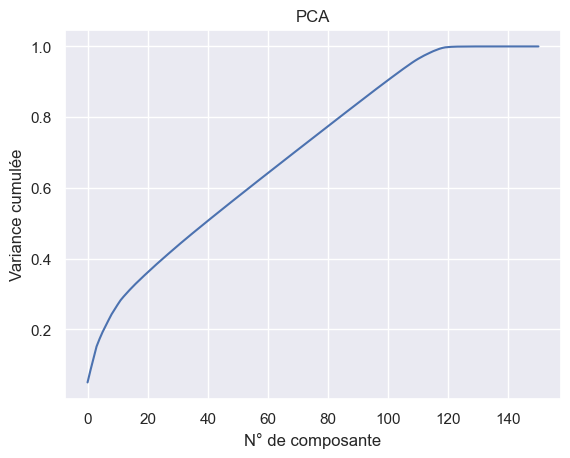

In [8]:
fig = plt.figure()
pd.Series(PCA.explained_variance_ratio_).cumsum().plot()
plt.title('PCA')
plt.xlabel('N° de composante')
plt.ylabel('Variance cumulée')
plt.show()

In [9]:
print(f'Explication de la variance sur les 2 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1])*100:.2f}%')

Explication de la variance sur les 2 premiers axes = 8.55%


In [10]:
print(f'Explication de la variance sur les 3 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1] + PCA.explained_variance_ratio_[2])*100:.2f}%')

Explication de la variance sur les 3 premiers axes = 11.93%


La PCA est inneficace pour projeter les données sur 2 ou 3 axes. La variance exprimée dans ce cas est trop faible, le jeu de données est mal représenté

### Sans outliers

In [11]:
def acp(df: pd.DataFrame, no_flyers = False):
    df_pca = df.select_dtypes(['number'])
    if no_flyers:
        df_pca = df_pca[(np.abs(stats.zscore(df_pca)) < 3).all(axis=1)]
    
    print(f'Shape du dataframe: {df_pca.shape}')
    
    df_pca = scale(df_pca, False)
    
    pca_columns = df_pca.columns.to_list()
    
    PCA = decomposition.PCA(n_components=df_pca.shape[1])
    PCA.fit(df_pca.values)
    
    fig = plt.figure()
    pd.Series(PCA.explained_variance_ratio_).cumsum().plot()
    plt.title('PCA')
    plt.xlabel('N° de composante')
    plt.ylabel('Variance cumulée')
    plt.show()
    
    print(f'Explication de la variance sur les 2 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1])*100:.2f}%')
    print(f'Explication de la variance sur les 3 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1] + PCA.explained_variance_ratio_[2])*100:.2f}%')
    
    return PCA, pca_columns

Shape du dataframe: (15436, 151)


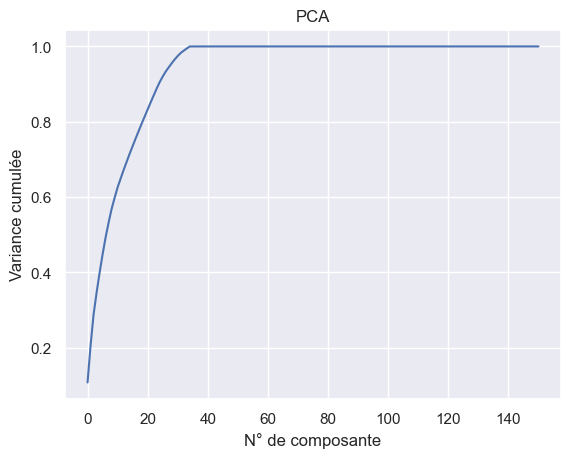

Explication de la variance sur les 2 premiers axes = 20.50%
Explication de la variance sur les 3 premiers axes = 28.78%


In [12]:
PCA_no_flyers, PCA_no_flyers_columns = acp(df, True)

La PCA est bien meilleure sans les outliers. On voit qu'une grande quantité de features ne participent pas à la représentation des données

In [13]:
serie = pd.Series(PCA_no_flyers.explained_variance_ratio_).cumsum()
nb_bad = serie[serie > 0.99].shape[0]
print(f'{nb_bad} composantes ne participent pas à la représentation des données')

118 composantes ne participent pas à la représentation des données


## Kmeans

### Recherche manuelle

In [14]:
from sklearn.cluster import KMeans

df_kmean_1 = scale(df.select_dtypes('number')).sample(6000)
X = df_kmean_1.values

silhouette = pd.DataFrame()

for n_clusters in range(2,10,1):
    for i in range(5):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        silhouette.loc[n_clusters, f'test {i+1}'] = metrics.silhouette_score(X=X, labels=kmeans.labels_, sample_size=1000)
silhouette['mean'] = silhouette.mean(axis=1)
silhouette['std'] = silhouette.std(axis=1)

silhouette

,test 1,test 2,test 3,test 4,test 5,mean,std
2,0.922775,0.928879,0.926094,0.915950,0.914482,0.921636,0.005606
3,0.907191,0.887399,0.903046,0.910156,0.903500,0.902258,0.007870
4,0.569771,0.584338,0.576334,0.602301,0.558461,0.578241,0.014715
5,0.632403,0.587524,0.598094,0.577129,0.621471,0.603324,0.020679
6,0.589344,0.611465,0.564263,0.583398,0.582719,0.586238,0.015162
7,0.374854,0.339837,0.398304,0.326226,0.575192,0.402883,0.089831
8,0.345977,0.166930,0.411731,0.407369,0.340788,0.334559,0.088911
9,0.273475,0.205608,0.163964,0.269707,0.169483,0.216447,0.047258


Le clustering est stable

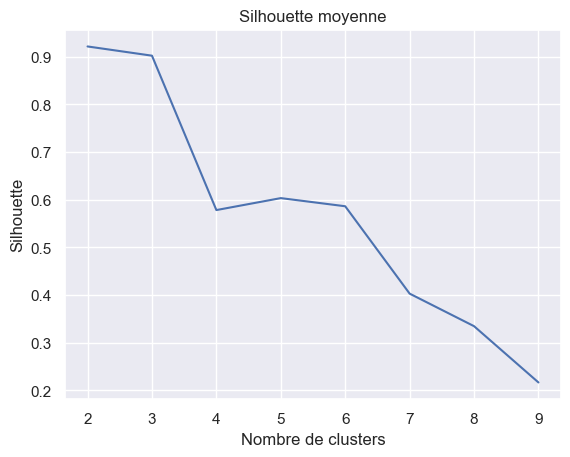

In [15]:
silhouette['mean'].plot()
plt.title('Silhouette moyenne')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette')
plt.show()

Avec seulement 2 ou 3 clusters, l'interprétation sera compliquée 

La solution a 4 clusters pourraient etre meilleure pour la segmentation

### Recherche avec la librairie Yellowbrick

In [16]:
from yellowbrick.cluster import elbow
def model_kmean(df, n_clusters = None, silhouette_only = False, silhouette_print = True, random_state = None, custom_pairplots = []):
    
    # Selection des types number uniquement
    df_kmean = df.select_dtypes('number')
    
    # Robust scale
    df_scaled = scale(df_kmean)
    
    # Yellow brick
    if n_clusters == None:
        X = df_scaled.sample(6000, random_state=RANDOM_STATE).values
        model = KMeans()
        visualizer = elbow.kelbow_visualizer(model=model, X=X, k=(2,10), timings=True, show=(not silhouette_only))
        visualizer.fit(X)
        n_clusters = visualizer.elbow_value_
        if (silhouette_only):
            plt.clf()
            plt.close()
    
    # Fit
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(df_scaled)
    
    # Silhouette
    silhouette = metrics.silhouette_score(X=df_scaled.values, labels=kmeans.labels_, sample_size=np.min([10000, df_scaled.shape[0]]), random_state=random_state)
    if silhouette_print: print(f'Silhouette: {silhouette:.3f}')
    if silhouette_only: return silhouette
    
    # Graph comptage client/cluster
    sns.histplot(x=kmeans.labels_, stat='count', log_scale=[False, True], discrete=True)
    plt.title('Nombre de clients par cluster')
    plt.xticks(list(np.sort(np.unique(kmeans.labels_))))
    plt.xlabel('N° de cluster')
    plt.ylabel('Nombre de clients')
    plt.show()
    
    # Graph 3D RFM
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(df_kmean['recence'], df_kmean['frequence'], df_kmean['montant'], marker='o', s=30, edgecolor='k', c=kmeans.labels_, cmap='Set3')
    ax.set_xlabel('Récence')
    ax.set_ylabel('Fréquence')
    ax.set_zlabel('Montant')
    ax.view_init(elev=15, azim=45)
    plt.show()
    
    # Pair plot des feature du DF
    df_kmean['class'] = kmeans.labels_
    df_kmean['label'] = kmeans.labels_
    sns.pairplot(data=df_kmean, vars=['recence', 'frequence', 'montant'] + custom_pairplots + ['label'], hue='class', palette='bright')
    
    return kmeans

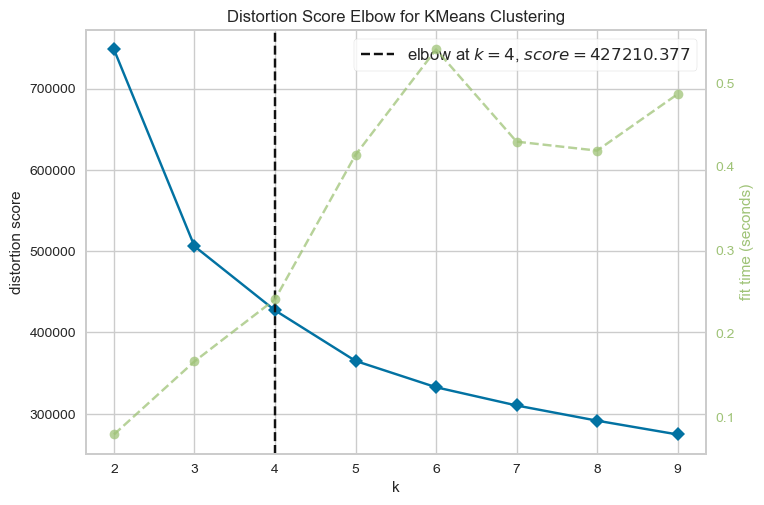

Silhouette: 0.586


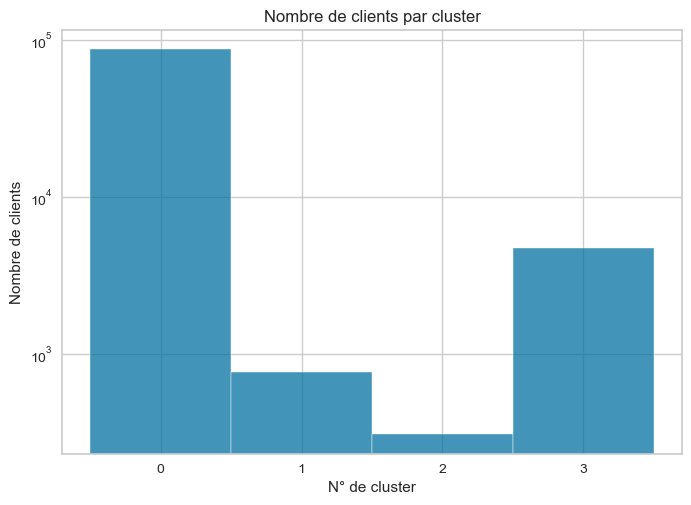

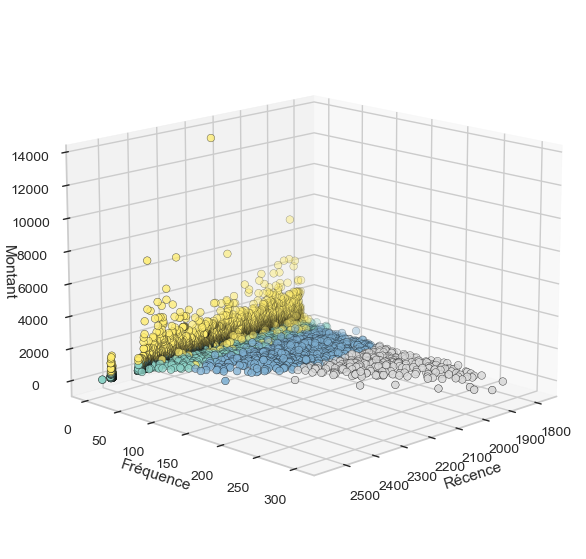

KMeans(n_clusters=4, random_state=190276)

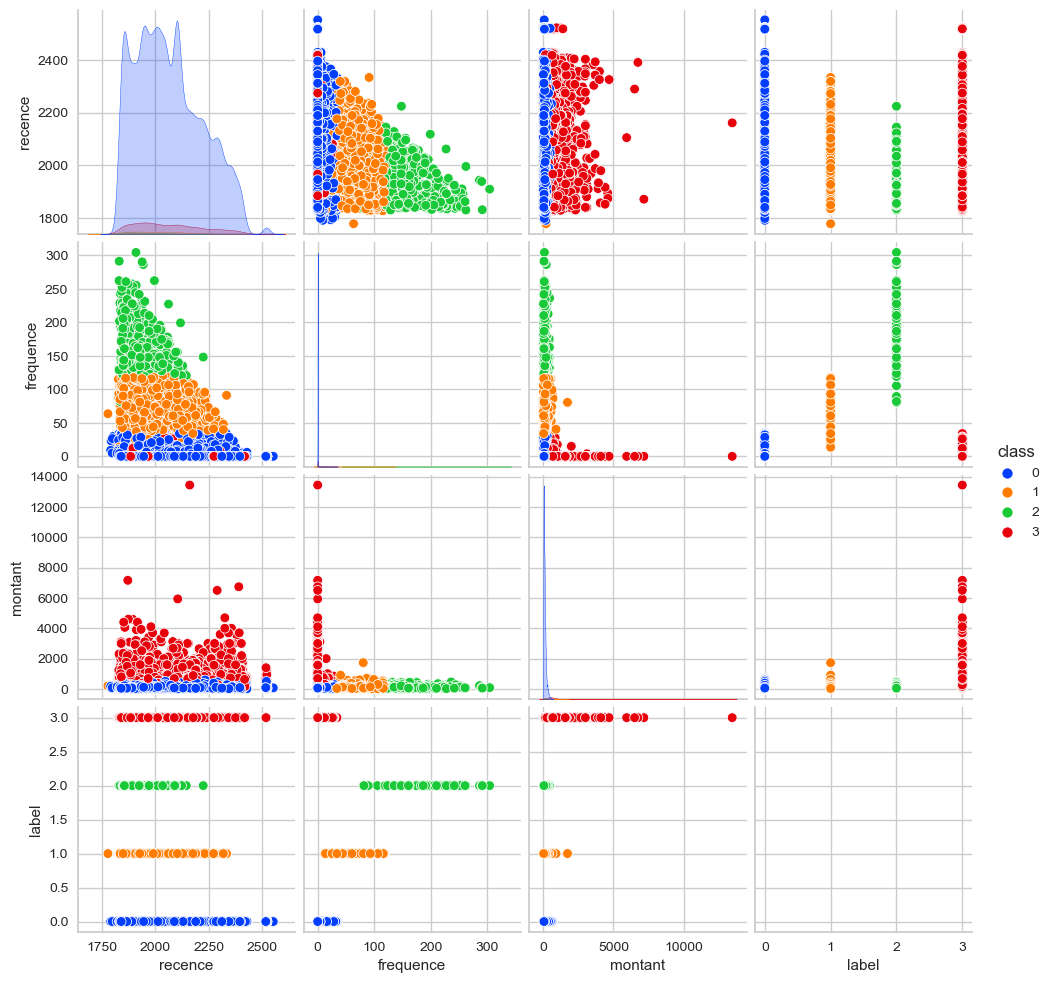

In [17]:
df_kmean_1 = df.copy()
df_kmean_1.rename(columns={'purchase_days_from_today_min': 'recence', 'order_frequency': 'frequence', 'mean_orders_price': 'montant'}, inplace=True)

model_kmean(df_kmean_1,random_state=RANDOM_STATE)

In [18]:
df_kmean_1 = df.copy()
df_kmean_1.rename(columns={'purchase_days_from_today_min': 'recence', 'order_frequency': 'frequence', 'mean_orders_price': 'montant'}, inplace=True)

silhouettes = []
for i in range(10):
    silhouettes.append(model_kmean(df_kmean_1, n_clusters=4, silhouette_only=True))
    
print(f'Silhouette moyenne: {np.mean(silhouettes):.3f}, Ecart type: {np.std(silhouettes):.4f}')

Silhouette: 0.568
Silhouette: 0.579
Silhouette: 0.579
Silhouette: 0.579
Silhouette: 0.575
Silhouette: 0.567
Silhouette: 0.582
Silhouette: 0.585
Silhouette: 0.586
Silhouette: 0.579
Silhouette moyenne: 0.578, Ecart type: 0.0060


Le clustering est stable

## Conclusion

Dans notre cas de figure, l'utilisation de la globalité des données (avec les infos produits, catégories etc...) donne un resultat interprétrable des clusters avec un coeficient de silhouette plutot bon (0.586)

Hypothèse de segmentation:

<div style="margin-left: 0; margin-right: auto; width: 40%">
    
Class | Recence | Fréquence | Montants | Segment
--- | --- | --- |--- | ---
3 | Diverse | Faible | Faibles à élévés | Acheteurs compulsifs  
2 | Faible à moyenne | Moyenne à Elévée | Faibles | Acheteur nouveau et engagés
1 | Diverse | Faible à Moyenne | Moyens | Acheteur régulier
0 | Diverse | Faible | Faible | Acheteur pontuel


</div>    

# Test clustering avec un dataset RFM

Je décide de restreindre le dataframe eux composantes RFM (récence, fréquence, montant)

## Création et normalisation du dataset RFM

In [19]:
df_rfm = pd.DataFrame()
df_rfm['recence'] = df['purchase_days_from_today_min']
df_rfm['frequence'] = df['order_frequency']
df_rfm['montant'] = df['mean_orders_price']
df_rfm

,recence,frequence,montant
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1938,0.0,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1941,0.0,18.90
0000f46a3911fa3c0805444483337064,2364,0.0,69.00
0000f6ccb0745a6a4b88665a16c9f078,2148,0.0,25.99
0004aac84e0df4da2b147fca70cf8255,2115,0.0,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2274,0.0,1570.00
fffea47cd6d3cc0a88bd621562a9d061,2089,0.0,64.89
ffff371b4d645b6ecea244b27531430a,2395,0.0,89.90


## Visualisation

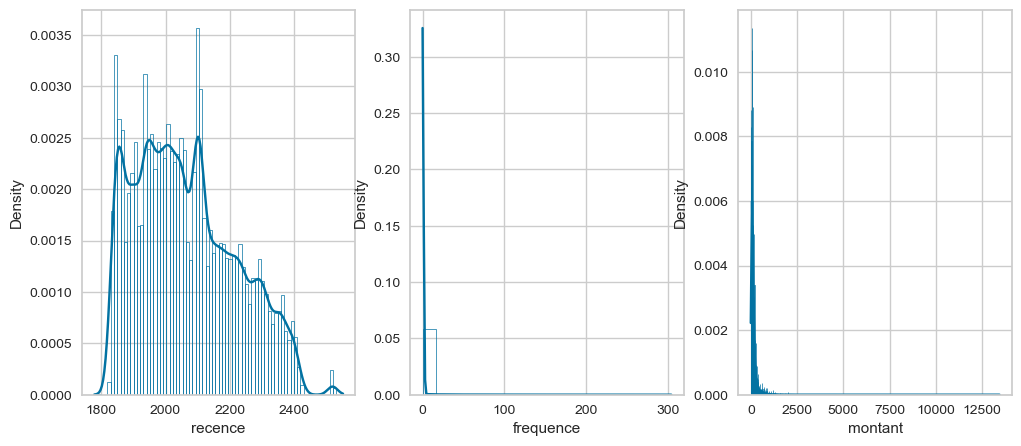

In [20]:
fig, ax =plt.subplots(1,3,figsize=(12,5))
ax1 = sns.histplot(data=df_rfm, x='recence', stat='density', kde=True, fill=False, ax=ax[0])
ax2 = sns.histplot(data=df_rfm, x='frequence', stat='density', kde=True,fill=False, ax=ax[1])
ax3 = sns.histplot(data=df_rfm, x='montant', stat='density', kde=True, fill=False, ax=ax[2])

La récence est relativement homogène mais la fréquence et les montant sont concentrés sur de petites valeurs

## Kmeans

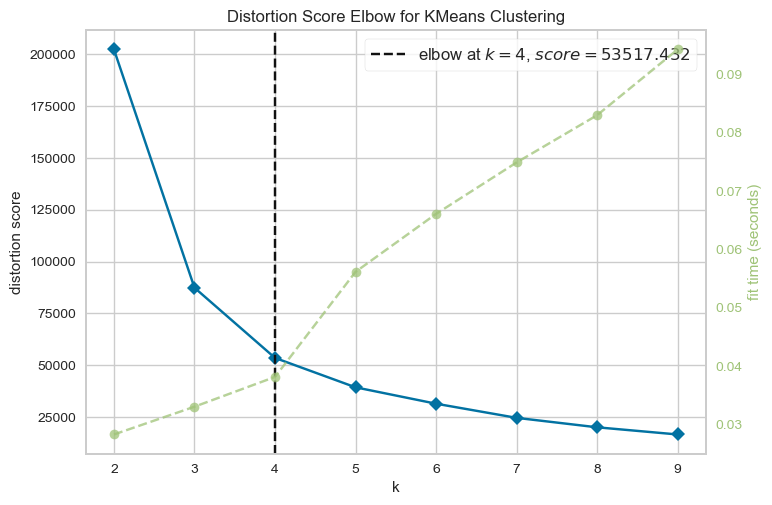

Silhouette: 0.948


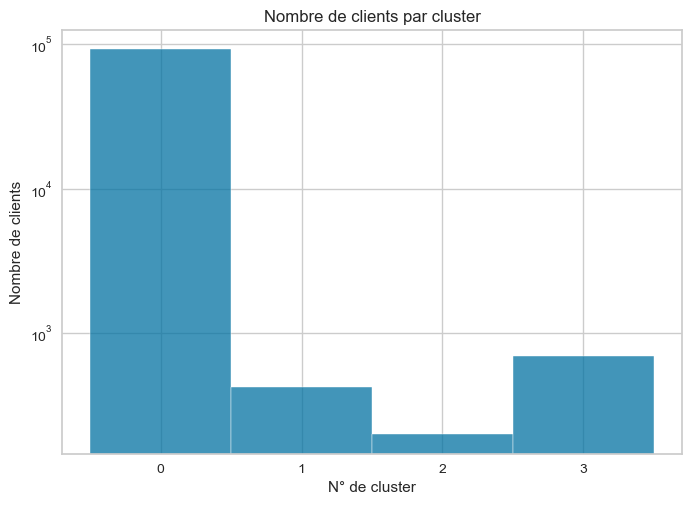

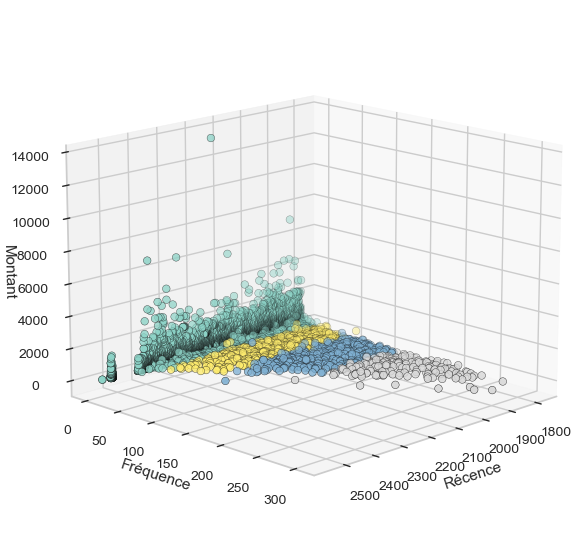

KMeans(n_clusters=4, random_state=190276)

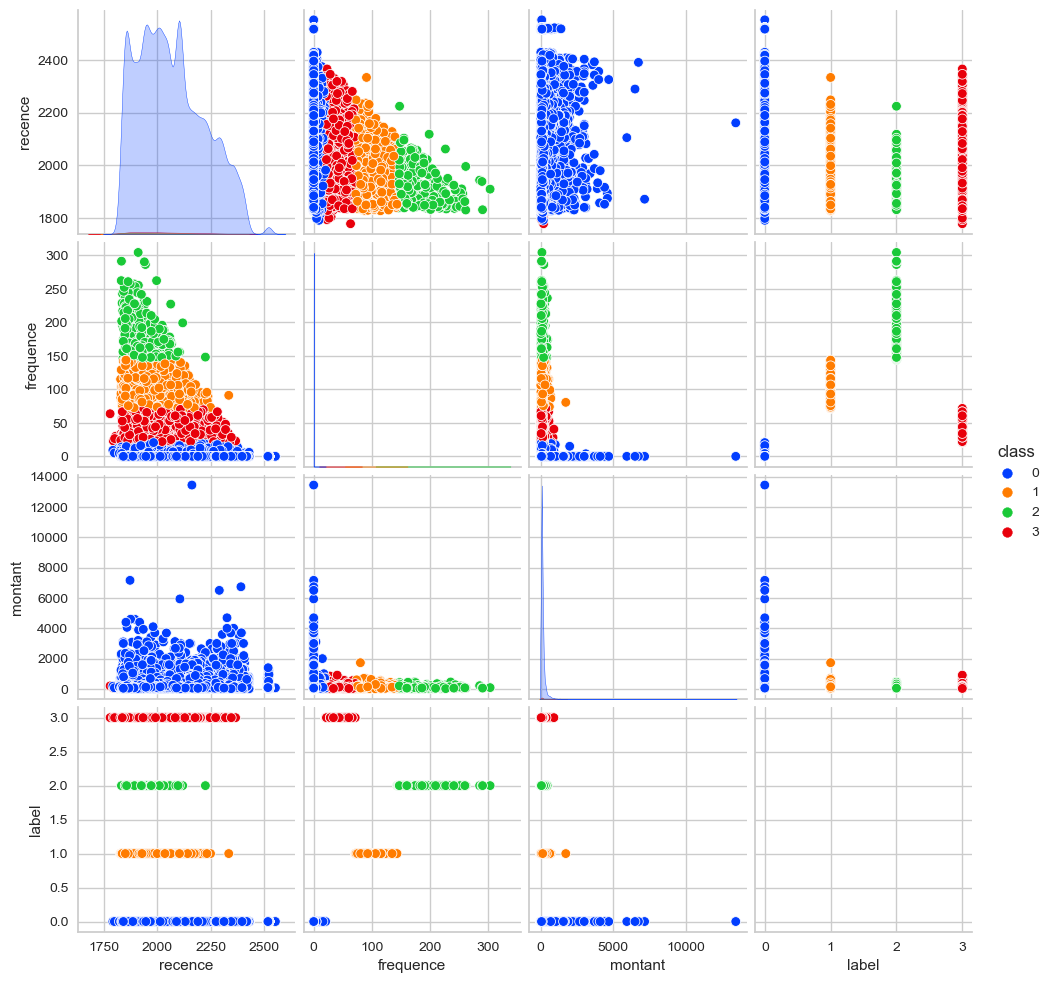

In [21]:
model_kmean(df=df_rfm, random_state=RANDOM_STATE)

### Conclusion

En ne gardant que les données RFM le coeficient de silhouette est bien meilleurs (0.948 au lieu de 0.586 avec le dataset complet) et la segmentation est visuellement plus nette

Hypothèse de segmentation:

<div style="margin-left: 0; margin-right: auto; width: 40%">
    
Class | Recence | Fréquence | Montants | Segment
--- | --- | --- |--- | ---
3 | Diverse | Faible | Faible | Acheteur pontuel     
2 | Faible à moyenne | Moyenne à Elévée | Faibles | Acheteur nouveau et engagés
1 | Faible à moyenne | Moyenne | Faible à Moyens | Acheteur régulier  
0 | Diverse | Faible | Faibles à élévés | Acheteurs compulsifs      

</div>  

## Dbscan

Analyse basée sur les explications de cet article: https://sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

Aide sur memory overflow: https://stackoverflow.com/questions/16381577/scikit-learn-dbscan-memory-usage

### Distance optimum

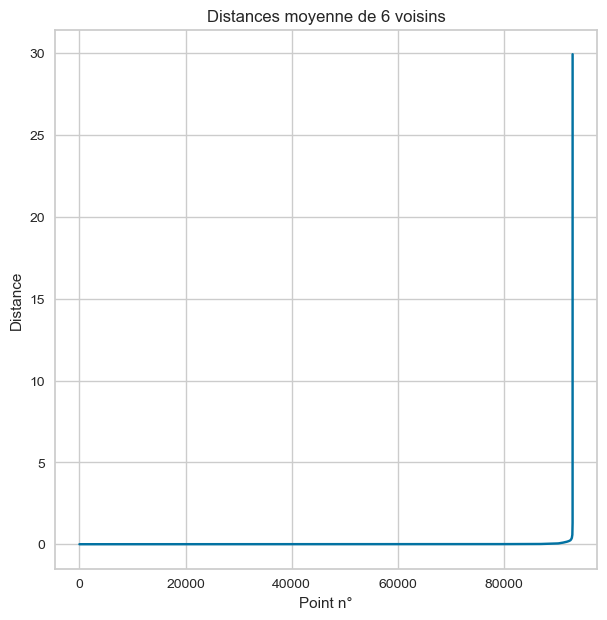

In [22]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

df_dbscan = scale(df_rfm, robust=False)
n_neighbors = df_dbscan.shape[1]*2

neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors_fit = neighbors.fit(df_dbscan)
distances, indices = neighbors_fit.kneighbors(df_dbscan)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(7, 7))
plt.plot(range(len(distances)), distances)
plt.title(f'Distances moyenne de {n_neighbors} voisins')
plt.xlabel('Point n°')
plt.ylabel('Distance')
plt.show()

Recherche du point d'inflexion


<Figure size 500x500 with 0 Axes>

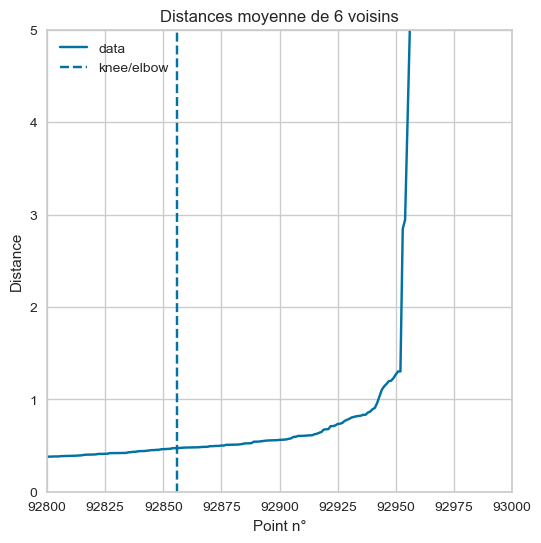

Distance optimum: 0.4714


In [23]:
from kneed import KneeLocator

print('Recherche du point d\'inflexion')

i = np.arange(len(distances))
knee = KneeLocator(i, distances, curve='convex', direction='increasing')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.xlim(92800, 93000)
plt.ylim(0, 5)
plt.title(f'Distances moyenne de {n_neighbors} voisins')
plt.xlabel('Point n°')
plt.ylabel('Distance')
plt.show()

print(f'Distance optimum: {distances[knee.knee]:.4f}')

### Model

In [24]:
from sklearn.cluster import DBSCAN

X = df_dbscan.values

dbscan = DBSCAN(eps=distances[knee.knee], min_samples=n_neighbors, n_jobs=-1)
dbscan.fit(X)

DBSCAN(eps=0.4713566418168682, min_samples=6, n_jobs=-1)

In [25]:
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Nombre de clusters: {n_clusters_}')
print(f'Nombre d\'outiers: {n_noise_}')

Nombre de clusters: 10
Nombre d'outiers: 234


In [26]:
silhouette = metrics.silhouette_score(X=df_dbscan.values, labels=labels, sample_size=3000)
print(f'Score silhouette: {silhouette:.3f}')

Score silhouette: 0.461


Text(0.5, 1.0, 'Nombre de clients par cluster')

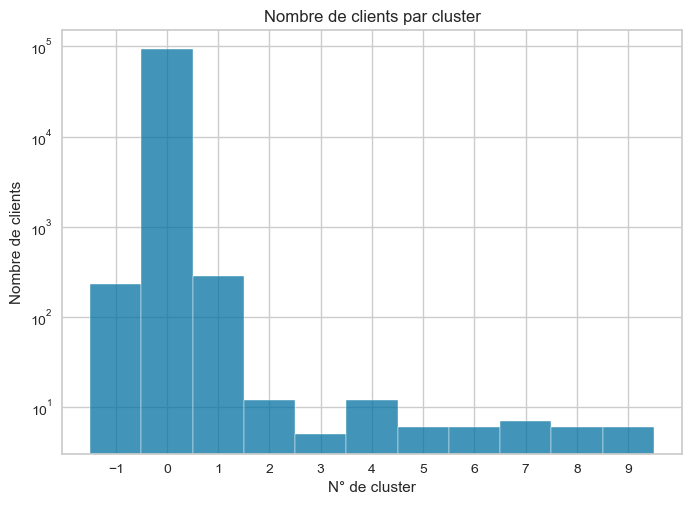

In [27]:
sns.histplot(x=labels, stat='count', log_scale=[False, True], discrete=True)
plt.xticks(range(-1, n_clusters_, 1))
plt.xlabel('N° de cluster')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients par cluster')

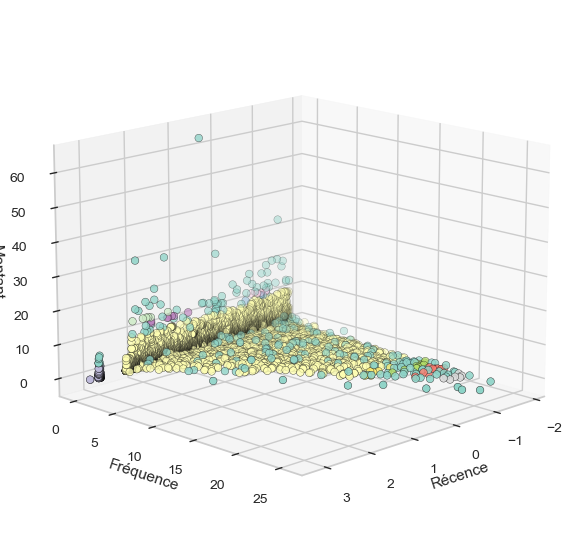

In [28]:
df_dbscan['label'] = labels
df_dbscan['class'] = labels
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_dbscan['recence'], df_dbscan['frequence'], df_dbscan['montant'], marker='o', s=30, edgecolor='k', c=df_dbscan['label'], cmap='Set3')
ax.set_xlabel('Récence')
ax.set_ylabel('Fréquence')
ax.set_zlabel('Montant')
ax.view_init(elev=15, azim=45)

On constate déjà visuellement que le cluster le plus important s'étale trop

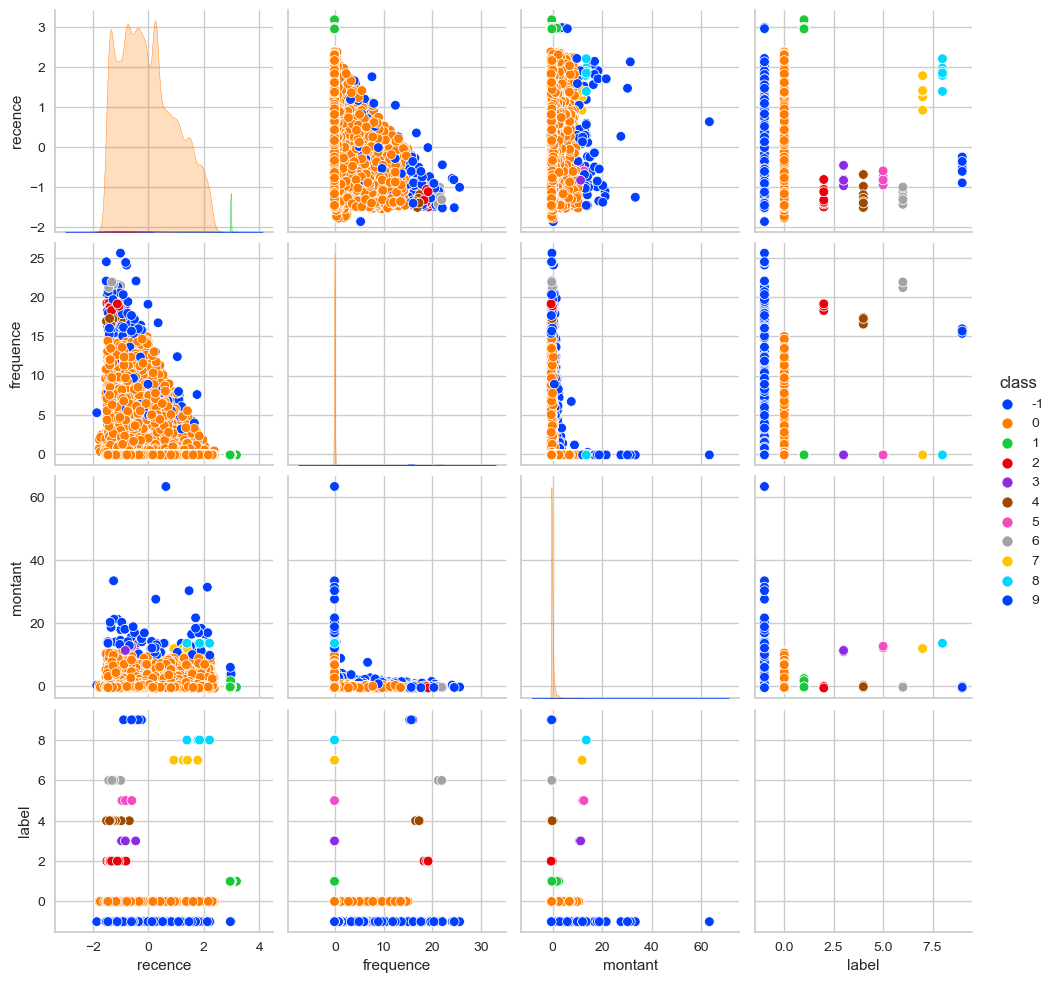

In [29]:
sns.pairplot(data=df_dbscan, hue='class', palette='bright')

Le clustering n'est pas très concluant

- Les classes 2,4,6,9 sont quasiement identiques et pourraient former un seul cluster
- Les classes 8,7 sont quasiement identiques et pourraient aussi former un seul cluster
- Les classes 3,5 sont quasiement identiques et pourraient aussi former un seul cluster

Soit eps est trop faible, soit le nombre de min_sample est trop élévé

Le coeficient de silouhette étant très inférieur à KMean, et DBSCAN etant très gourmand en memoire (plusieurs overflows pendant mes tests), je laisse cette solution de coté au profit de Kmean

# Test clustering KMean avec dataset RFM enrichi

## Variables influentes de la PCA sans outliers

In [30]:
df_pca_components = pd.DataFrame(PCA_no_flyers.components_[:,[0,1,2]], columns=['F1', 'F2', 'F3'], index=PCA_no_flyers_columns)

In [31]:
for column in df_pca_components.columns:
    df_pca_components[column+'_abs'] = df_pca_components[column].abs()

In [32]:
df_pca_components.sort_values(by='F1_abs', ascending=False).loc[:, 'F1'].head()

purchase_day_of_week_4_count     9.999995e-01
cat_artes_e_artesanato_count     1.006916e-03
cat_alimentos_bebidas_count     -2.951326e-17
purchase_days_from_today_mean   -1.401391e-17
cat_artes_count                 -1.168427e-17
Name: F1, dtype: float64

In [33]:
df_pca_components.sort_values(by='F2_abs', ascending=False).loc[:, 'F2'].head()

cat_artigos_de_natal_count               -0.467420
payment_sequential_mean                   0.427715
customer_geolocation_lat_most_frequent    0.425704
cat_artes_e_artesanato_count             -0.374379
customer_geolocation_lng_mean            -0.183635
Name: F2, dtype: float64

In [34]:
df_pca_components.sort_values(by='F3_abs', ascending=False).loc[:, 'F3'].head()

cat_bebidas_count           -0.462687
cat_beleza_saude_count       0.405186
cat_bebes_count             -0.326257
cat_consoles_games_count     0.252711
cat_casa_construcao_count   -0.226272
Name: F3, dtype: float64

## Influence des variables influentes de la PCA sur le Kmeans

In [35]:
def kmean_enrichie(columns, silhouette_only = True, one_by_one = True):
    results = []
    
    if one_by_one:
        for index, column in enumerate(columns):

            # df enrichie = df RFM + columns
            df_rfm_enrichi = df_rfm.copy()
            df_rfm_enrichi = df_rfm_enrichi.join(df[column])

            # Model kmean
            silhouette = model_kmean(df=df_rfm_enrichi, random_state=RANDOM_STATE, silhouette_only=silhouette_only, silhouette_print=(not silhouette_only))
            print('.', end='')
            results.append([column, f'{silhouette}', f'+{(silhouette - 0.948):.4f}' if silhouette - 0.948 > 0 else ''])

        print('')
        print(tabulate(results, headers=['Colonne', 'Silhouette', 'Progression'], tablefmt='orgtbl'))
    else:
        df_rfm_enrichi = df_rfm.copy()
        df_rfm_enrichi = df_rfm_enrichi.join(df[columns])

        # Model kmean
        silhouette = model_kmean(df=df_rfm_enrichi, random_state=RANDOM_STATE, silhouette_only=silhouette_only, silhouette_print=(not silhouette_only))

In [36]:
columns = df_pca_components.sort_values(by='F1_abs', ascending=False).loc[:, 'F1'].head().index.to_list() \
        + df_pca_components.sort_values(by='F2_abs', ascending=False).loc[:, 'F2'].head().index.to_list() \
        + df_pca_components.sort_values(by='F3_abs', ascending=False).loc[:, 'F3'].head().index.to_list()

kmean_enrichie(columns)

...............
| Colonne                                |   Silhouette | Progression   |
|----------------------------------------+--------------+---------------|
| purchase_day_of_week_4_count           |     0.946342 |               |
| cat_artes_e_artesanato_count           |     0.948448 | +0.0004       |
| cat_alimentos_bebidas_count            |     0.948378 | +0.0004       |
| purchase_days_from_today_mean          |     0.943194 |               |
| cat_artes_count                        |     0.948406 | +0.0004       |
| cat_artigos_de_natal_count             |     0.948435 | +0.0004       |
| payment_sequential_mean                |     0.947268 |               |
| customer_geolocation_lat_most_frequent |     0.92718  |               |
| cat_artes_e_artesanato_count           |     0.948448 | +0.0004       |
| customer_geolocation_lng_mean          |     0.938811 |               |
| cat_bebidas_count                      |     0.948392 | +0.0004       |
| cat_beleza_saude_cou

Une majorité des colonnes significatives de la PCA sans outliers augmentent le score de silhouett du clustering RFM, mais non significativement

Dans notre cas, la PCA ne nous aidera a identifier des features à ajouter au clustering RFM

On peut tester sur chaque feature pour voir

## Influence de chaque variable du DF original

In [37]:
original_rfm_columns = ['purchase_days_from_today_min', 'order_frequency', 'mean_orders_price']
kmean_enrichie(df.drop(columns=original_rfm_columns).select_dtypes('number').columns.to_list())

....................................................................................................................................................
| Colonne                                                  |   Silhouette | Progression   |
|----------------------------------------------------------+--------------+---------------|
| orders_count                                             |     0.948221 | +0.0002       |
| customer_geolocation_lat_mean                            |     0.927178 |               |
| customer_geolocation_lat_count                           |     0.948221 | +0.0002       |
| customer_geolocation_lat_most_frequent                   |     0.92718  |               |
| customer_geolocation_lng_mean                            |     0.938811 |               |
| customer_geolocation_lng_count                           |     0.948221 | +0.0002       |
| customer_geolocation_lng_most_frequent                   |     0.938799 |               |
| products_count_min   

Globalement, aucune variable n'influence fortement le clustering

On peut utiliser 'elapse_time_mean' pour renforcer la silhouette du clustering et se permettre d'ajouter d'autres variables pénalisantes pour caractériser un peu plus les clusters sans pénaliser le score silhouette

## Visualisation du clustering par review score

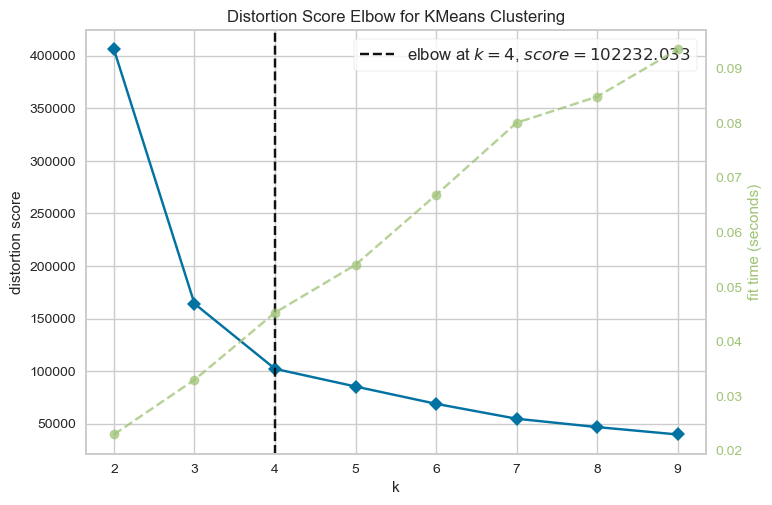

Silhouette: 0.948


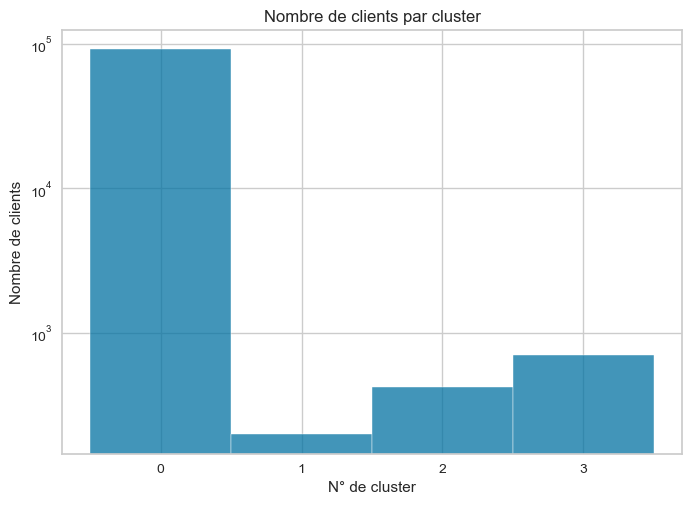

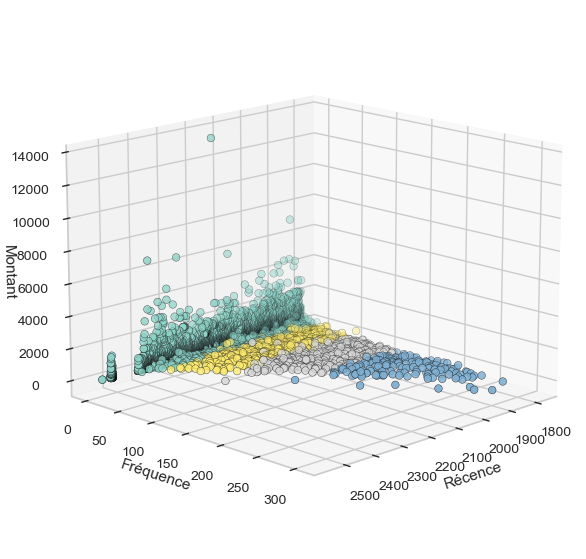

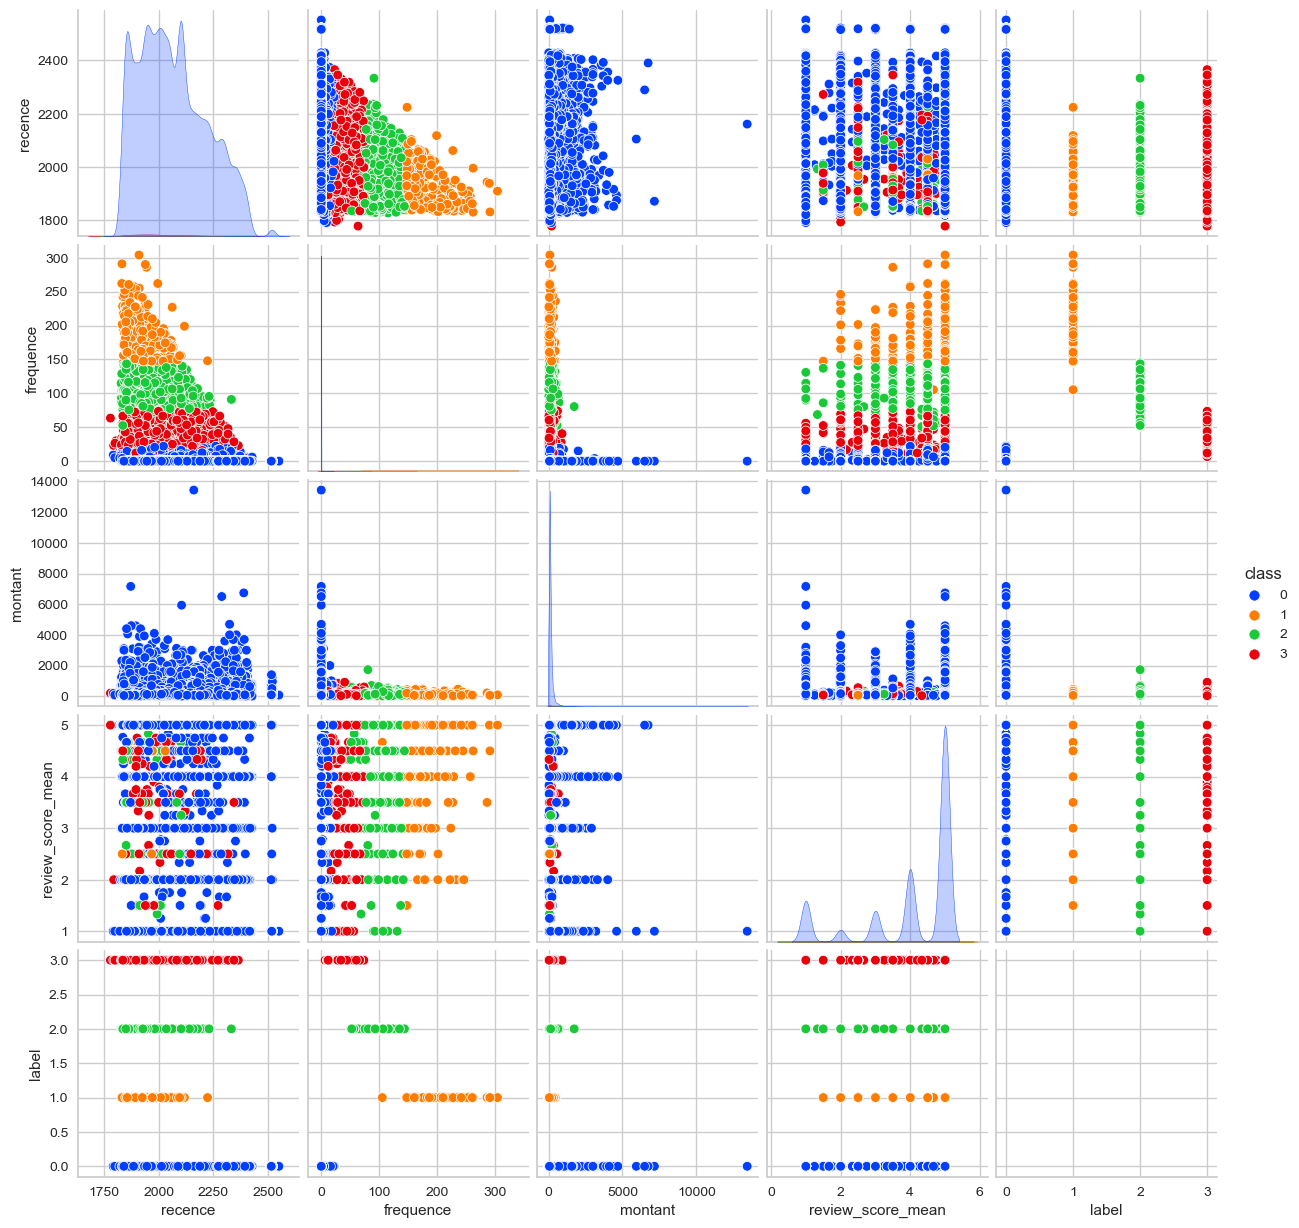

In [38]:
best_columns = ['elapse_time_mean',
                'review_score_mean']
df_rfm_enrichi = df_rfm.join(df[best_columns])
silhouette = model_kmean(df=df_rfm_enrichi, random_state=RANDOM_STATE, custom_pairplots=['review_score_mean'])

L'ajout du review_score_mean n'apporte pas vraiment d'indication majeur dans l'analyse RFM

# Enregistrement du Dataframe RFM

In [39]:
df_save = pd.concat([df_rfm, df[['order_purchase_timestamp_max', 'order_period_year_max', 'order_period_quarter_max', 'order_period_month_max']]], axis=1)
df_save.to_pickle(ROOT_OUTPUT + 'rfm.pickle')